+-------+-----+-----+--------+-------------+------+----------------+
| Run   |   a |   b | f(n)   |        T(n) |    n |   Elapsed Time |
+=======+=====+=====+========+=============+======+================+
| Run 1 |   3 | 1.6 | n^3    | 4.2519e+13  | 2800 |              0 |
+-------+-----+-----+--------+-------------+------+----------------+
| Run 1 |   2 | 1.2 | n^4    | 9.35593e+13 | 2800 |              0 |
+-------+-----+-----+--------+-------------+------+----------------+
| Run 1 |   3 | 1.4 | n^3    | 3.31495e+13 | 2800 |              0 |
+-------+-----+-----+--------+-------------+------+----------------+
| Run 2 |   3 | 1.6 | n^3    | 1.97036e+15 | 7293 |              0 |
+-------+-----+-----+--------+-------------+------+----------------+
| Run 2 |   2 | 1.2 | n^4    | 4.31072e+15 | 7293 |              0 |
+-------+-----+-----+--------+-------------+------+----------------+
| Run 2 |   3 | 1.4 | n^3    | 1.53661e+15 | 7293 |              0 |
+-------+-----+-----+--------+----

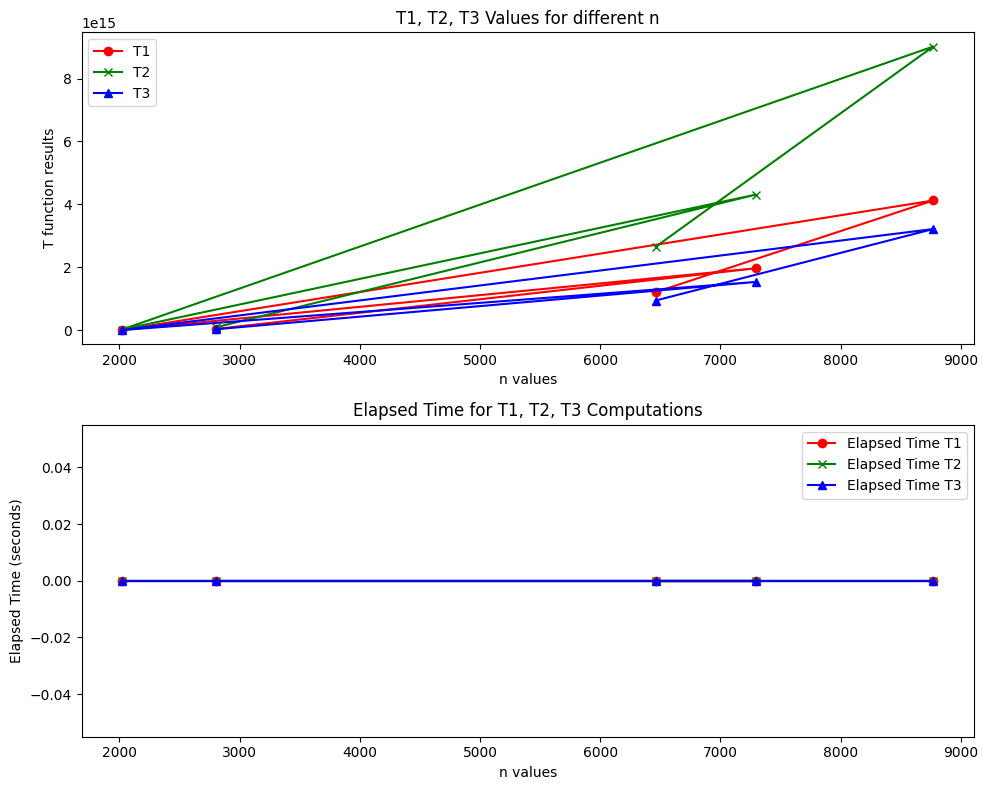

In [50]:
from functools import lru_cache
import random
from itertools import product, islice, chain
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

possible_a = range(1,4)
possible_b = [1 + i / 5 for i in range(1, 4)]

f_choices = {
    "n^2": lambda n: n**2,
    "n^3": lambda n: n**3,
    "n^4": lambda n: n**4
}

f_choice_items = list(f_choices.items())

all_params = list(product(possible_a, possible_b, f_choice_items))
random.shuffle(all_params)

selected_params = list(chain.from_iterable(islice(all_params, 3)))
random_n_values = [random.randint(1000, 10000) for _ in range(5)]


a1, b1, (f1_name, f1), a2, b2, (f2_name, f2), a3, b3, (f3_name, f3) = selected_params

# Memoized recursive functions
@lru_cache(None)
def T1(n):
    if n < 10:
        return n
    return a1 * T2(n // b1) + f1(n)

@lru_cache(None)
def T2(n):
    if n < 10:
        return n
    return a2 * T3(n // b2) + f2(n)

@lru_cache(None)
def T3(n):
    if n < 10:
        return n
    return a3 * T1(n // b3) + f3(n)

# Function to compute values and their elapsed time
def compute_T_values(n):
    # Time calculation for T1
    start_time = time.time()
    t1 = T1(n)
    elapsed_time_1 = time.time() - start_time

    # Time calculation for T2
    start_time = time.time()
    t2 = T2(n)
    elapsed_time_2 = time.time() - start_time

    # Time calculation for T3
    start_time = time.time()
    t3 = T3(n)
    elapsed_time_3 = time.time() - start_time

    # Return results as a list of tuples
    return [
        (a1, b1, f1_name, t1, elapsed_time_1, n),
        (a2, b2, f2_name, t2, elapsed_time_2, n),
        (a3, b3, f3_name, t3, elapsed_time_3, n),
    ]

# Memo to store combined results
combined_memo = {}

# Iterate over random n values and store results
for n in random_n_values:
    result = compute_T_values(n)
    combined_memo[n] = result

# Prepare table data for output
table_data_memoized = []
headers = ["Run", "a", "b", "f(n)", "T(n)", "n", "Elapsed Time"]

for idx, n in enumerate(combined_memo):
    results = combined_memo[n]  # Access the list of tuples for each n
    for result in results:  # Iterate over each result tuple
        table_data_memoized.append(
            [f"Run {idx + 1}", result[0], result[1], result[2], result[3], result[5], result[4]]
        )

# Now table_data_memoized should contain the structured data
print(tabulate(table_data_memoized, headers=headers, tablefmt="grid"))

# Plot results function
def plot_results(combined_memo):
    n_values = list(combined_memo.keys())  # Extract n values
    t1_values = [result[0][3] for result in combined_memo.values()]  # Extract T1 results
    t2_values = [result[1][3] for result in combined_memo.values()]  # Extract T2 results
    t3_values = [result[2][3] for result in combined_memo.values()]  # Extract T3 results

    elapsed_t1 = [result[0][4] for result in combined_memo.values()]  # Elapsed time for T1
    elapsed_t2 = [result[1][4] for result in combined_memo.values()]  # Elapsed time for T2
    elapsed_t3 = [result[2][4] for result in combined_memo.values()]  # Elapsed time for T3

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # First subplot for T1, T2, and T3 values
    ax1.plot(n_values, t1_values, label="T1", marker="o", color="r")
    ax1.plot(n_values, t2_values, label="T2", marker="x", color="g")
    ax1.plot(n_values, t3_values, label="T3", marker="^", color="b")
    ax1.set_xlabel("n values")
    ax1.set_ylabel("T function results")
    ax1.set_title("T1, T2, T3 Values for different n")
    ax1.legend()

    # Second subplot for elapsed times
    ax2.plot(n_values, elapsed_t1, label="Elapsed Time T1", marker="o", color="r")
    ax2.plot(n_values, elapsed_t2, label="Elapsed Time T2", marker="x", color="g")
    ax2.plot(n_values, elapsed_t3, label="Elapsed Time T3", marker="^", color="b")
    ax2.set_xlabel("n values")
    ax2.set_ylabel("Elapsed Time (seconds)")
    ax2.set_title("Elapsed Time for T1, T2, T3 Computations")
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_results(combined_memo)
